<h3>回帰分析とは</h3>
回帰分析とは、データ間の関係性を一定の数式・公式でどれくらい説明できるかを調べる分析手法です。

ここで、出てくる用語として、目的変数と説明変数があります。

目的変数はゴールとなる予測したいデータのことです。

説明変数は予測したいデータの要因となるデータのことです。

実際に計算式としては、単回帰式をy=ax+bのように表すことが出来て、yが目的変数、xが説明変数となります。

ちなみに、aは回帰係数と呼ばれるものです。

<h3>単回帰と重回帰の違い</h3>
単回帰分析(線形)は、1つの数値からゴールとなる1つの数値を説明する分析です。
例えば、テレビCMから獲得契約件など、1つの数値からゴールとなる1つの数値を説明するのが、単回帰分析です。
そして、重回帰分析は、テレビCMや販促物、雑誌など複数の数値からゴールとなる1つの数値(獲得契約件)
を説明するのが重回帰分析になります。
重回帰分析は様々なデータ分析で使うことが出来ます。

<h3>単回帰</h3>
単回帰とは、
・教師あり学習の一種で
・目的変数が実数値
の手法です。
ピザの例で考えてみましょう。

もし、あなたが「ピザの直径」から「ピザの値段」を予測したいとき

予測に使うもの（ピザの直径）を説明変数

予測するもの（ピザの値段）を目的変数といいます。

用語の復習ですが、目的変数はゴールとなる予測したいデータのことで、

説明変数は予測したいデータの要因となるデータのことでした。

ピザの値段のように予測したいもの、すなわち目的変数が100,200などの実数値

の学習を回帰と呼びます。

簡単な回帰をピザの例を使って実装してみる。

In [2]:
#直径
x = [[12],[16],[20],[28],[36]]
#値段
y = [[700],[900],[1300],[1750],[1800]]

このデータがどのようになっているのか、回帰をする必要があるのかなど
可視化してみる

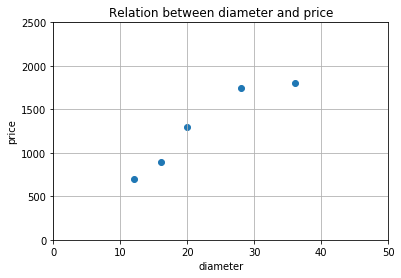

In [3]:
import matplotlib.pyplot as plt
#plt.figure()
plt.title('Relation between diameter and price')
plt.xlabel('diameter')
plt.ylabel('price')
plt.scatter(x, y)
plt.axis([0, 50, 0, 2500])
plt.grid(True)
plt.show()

この図をみると直径と値段には正の相関があるようにみえます。

このように、データをplotすることで回帰を行う必要があるか分かります。

では、次にscikit-learnを使って回帰を行なってみましょう。


まず、はじめにモデルを構築します。

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
#大きさが25のピザの値段を予測する
price = model.predict(25)
print("直径25センチの場合は:$%s"%price[0][0])

直径25センチの場合は:$1416.91810345


predictを使うことによって値段を予測できます。

上のプログラムを実行すると

25 inches pizza should cost: 1416.91810345円

と表示され予測できていることが分かります。 このように機械学習で予測をす
るには

<h4> 1.モデルの指定</h4>
model = LinearRegression()

<h4>2.学習</h4>
model.fit(x,y)

<h4>3.予測</h4>
price = model.predict(25)

によって行えます。
この手順は回帰以外のどの機械学習手法でも変わりません。

<h2>評価方法 決定係数(寄与率)</h2>

では、これは良い学習ができているのでしょうか？

良い学習ができているか確認するためには、評価が必要です。

回帰の評価方法として決定係数(または寄与率とも呼びます/r-squared)というものがあります。

決定係数(寄与率)とは、説明変数が目的変数をどのくらい説明できるかを表す値で高ければ高いほど良いとされます。

決定係数(寄与率)はscoreによって出力されます。

新たにテストデータを作成して、寄与率を計算してみましょう。

In [6]:
#テストデータの作成
x_test = [[16],[18],[22],[32],[24]]
y_test = [[1100], [850], [1500], [1800], [1100]]

score = model.score(x_test, y_test)
print("r-squared:", score)

r-squared: 0.662005292942


model.scoreによってそのモデルの寄与率を計算できます。

上記のプログラムを実行すると、

r-squared: 0.662005292942
と出力されています。

寄与率が0.66と高くはないですが、ある程度のモデルが作れているといえます。

<h2>重回帰</h2>

先程の単回帰より、良いモデルを作るにはどうしたら良いでしょうか？

ピザの例で考えると、
ピザの値段を決めているのは大きさだけではありません。

トッピングの数、パンの生地、種類など様々な要因が値段を決めています。

なので、値段に関わる要因を説明変数と増やせば増やすほど、値段を正確に予測することができます。

このように、説明変数を2つ以上で行う回帰のことを重回帰といいます。
（先程は説明変数が1つだったので単回帰といいます。）

実際に計算としては、

重回帰式をY=b1X1+b2X2+b3X3+b4X4+b5X5+‥‥+b0
のように表すことができ、b1,b2,‥を偏回帰係数といいます。

<h3>重回帰の実装例</h3>
では、重回帰を実装してみましょう。
先程のデータにトッピングの数を追加します。 
テストデータの方にも追加し、学習してみましょう。


In [7]:
from sklearn.linear_model import LinearRegression
x = [[12,2],[16,1],[20,0],[28,2],[36,0]]
y = [[700],[900],[1300],[1750],[1800]]

model = LinearRegression()
model.fit(x, y)

x_test = [[16,2],[18,0],[22,2],[32,2],[24,0]]
y_test = [[1100],[850],[1500],[1800],[1100]]

prices = model.predict(x_test)
for i, price in enumerate(prices):
    print('Predicted:%s, Target:%s'%(price, y_test[i]))
    
score = model.score(x_test, y_test)
print("r-squared", score)

Predicted:[ 1006.25], Target:[1100]
Predicted:[ 1028.125], Target:[850]
Predicted:[ 1309.375], Target:[1500]
Predicted:[ 1814.58333333], Target:[1800]
Predicted:[ 1331.25], Target:[1100]
r-squared 0.770167773132


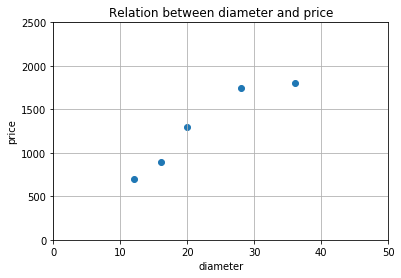

25 inches pizza should cost: 1416.91810345円
r-squared: 0.662005292942
Predicted:[ 1006.25], Target:[1100]
Predicted:[ 1028.125], Target:[850]
Predicted:[ 1309.375], Target:[1500]
Predicted:[ 1814.58333333], Target:[1800]
Predicted:[ 1331.25], Target:[1100]
r-squared: 0.770167773132


In [8]:
# 学習データ
x = [[12],[16],[20],[28],[36]]
y = [[700],[900],[1300],[1750],[1800]]


import matplotlib.pyplot as plt 
plt.figure()
plt.title('Relation between diameter and price') #タイトル
plt.xlabel('diameter') #軸ラベル 
plt.ylabel('price') #軸ラベル
plt.scatter(x,y) #散布図の作成
plt.axis([0, 50, 0, 2500]) #表の最小値、最大値
plt.grid(True) #grid線
plt.show()


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

price = model.predict(25)
print('25 inches pizza should cost: %s円'%price[0][0])


x_test = [[16],[18],[22],[32],[24]]
y_test = [[1100],[850],[1500],[1800],[1100]]

score = model.score(x_test,y_test)
print("r-squared:",score)



from sklearn.linear_model import LinearRegression
x = [[12,2],[16,1],[20,0],[28,2],[36,0]]
y = [[700],[900],[1300],[1750],[1800]]

model = LinearRegression()
model.fit(x,y)

x_test = [[16,2],[18,0],[22,2],[32,2],[24,0]]
y_test = [[1100],[850],[1500],[1800],[1100]]

prices = model.predict(x_test)
for i, price in enumerate(prices):
    print('Predicted:%s, Target:%s'%(price,y_test[i]))

score = model.score(x_test,y_test)
print("r-squared:",score)


<h3>単回帰と多項式回帰の違い</h3>

単回帰分析では、良い具合にデータの分布に沿った
一次関数の直線を引くことが出来ましたが、
一般的にそういったケースは稀です。

例えば以下のようなデータの分布があるとします。

ちなみに今回のデータはcos関数の分布に従います。

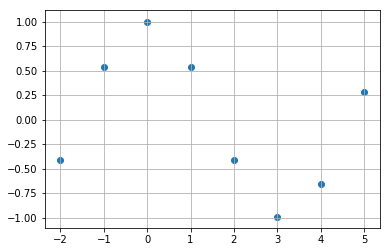

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 6, 1)
y = np.cos(x)

plt.scatter(x, y)
plt.grid(True)
plt.show()

<h2>多項式回帰</h2>

一次関数で直線的な関係がyとxに見られない時は多項式回帰が有効に使えます。

多項式回帰では、二次関数や三次関数のような次数の高い曲線的な分布のデータの予測を行うことが出来ます。
実装はscikit-learnは使わず、numpyだけで行います。

まずはnumpyをインポートして、データをnd.arrayで読み込みましょう。

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.2, -0.6, 0.0, 0.6, 1.2, 1.8, 2.4, 3.0, 3.6, 4.2])
y = np.array([0.36, 0.83, 1.0, 0.8, 0.4, -0.2, -0.7, -1.0, -0.89, -0.49])

numpyでの多項式回帰では、polyfit()関数と、poly1d()関数を用います。

polyfit()関数では、最大次元数を指定して、多項式回帰式を求める事が出来ます。

出力は各変数につく係数となります。poly1d()関数では、実際に回帰式が出力されます。

実際に出力を確認しましょう。

In [11]:
#３次元まで考えた場合
z = np.polyfit(x, y, 3)
print(z)
p = np.poly1d(z)
print(p)

[ 0.10079427 -0.47461797 -0.13951049  1.01047552]
        3          2
0.1008 x - 0.4746 x - 0.1395 x + 1.01


In [12]:
z30 = np.polyfit(x, y, 30)
p30 = np.poly1d(z30)

C:\Users\masayoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


今回はy=cos(x)の関係が正解データなので、作成した2つの多項式回帰の式とそれらを比較します。

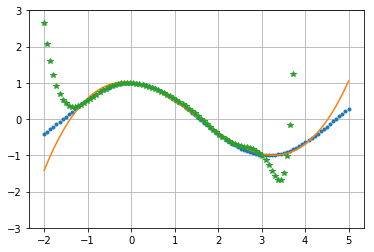

In [13]:
#２から５まで等間隔に１００等分した値を配列に格納
xp = np.linspace(-2, 5, 100)

#プロットする
#テストデータは緑の線、ｐは青の線、p３０は＊で記す
plt.plot(xp, np.cos(xp), '.', xp, p(xp), '-', xp, p30(xp), '*')
plt.ylim(-3, 3)
plt.grid(True)
plt.show()
plt.savefig('image.png')


実行すると以下のような出力が得られます。
最大次元数が30の*の点でプロットされたモデルは、x>3でyの値が急降下しています。

これは、いわゆる過学習というものです。

トレーニングデータとの精度をあげることに専念したため、テストデータとは似つか
ないモデルが出来たのです。

多項式回帰において、何次元を最大次元数とするかの問題は常に重要です。

<h1>まとめ</h1>
この章では回帰について学習しました。
説明変数が１つのときは単回帰、複数のときは重回帰と呼ばれます。
また、評価指標として寄与率を説明しました。

<h1>演習問題</h1>
1. ボストンの犯罪率や人口密度などの説明変数を使って、
ボストンにある家の価格を予測するモデルを作ってください。
また、そのときの寄与率を出力してください。
boston.feature_namesによって、説明変数が確認できます。

In [15]:
#データのダウンロード方法
from sklearn.datasets import load_boston
boston = load_boston()

x = boston.data
y = boston.target

print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [16]:
display(boston.data)

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [19]:
print(boston.data.shape)

(506, 13)


In [27]:
display(boston.target.shape)

(506,)

In [35]:
#重回帰によって予測してみる
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston.data,boston.target)
print(len(x_train))
print(len(x_test))
print(len(y_test))

379
127
127


In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

prices = model.predict(x_test)
for i, price in enumerate(prices):
    print('Predicted:%s, Target:%s'%(price, y_test[i]))

score = model.score(x_test, y_test)
print('r-squared:', score)

Predicted:28.9985397657, Target:25.0
Predicted:31.3149372045, Target:31.5
Predicted:21.8151180194, Target:18.7
Predicted:21.3729058294, Target:19.3
Predicted:27.305463377, Target:22.1
Predicted:12.3125843711, Target:15.2
Predicted:23.7648757766, Target:19.6
Predicted:15.8935562753, Target:13.1
Predicted:20.2525187257, Target:19.2
Predicted:26.0323623538, Target:25.0
Predicted:27.9115516109, Target:23.9
Predicted:27.5764461063, Target:22.3
Predicted:29.2205990771, Target:22.8
Predicted:24.9175310682, Target:24.8
Predicted:22.7587972824, Target:21.4
Predicted:20.9166868054, Target:21.7
Predicted:32.5551309607, Target:30.3
Predicted:30.4373044039, Target:25.1
Predicted:18.0836406911, Target:19.9
Predicted:8.51338118414, Target:5.0
Predicted:22.7273656757, Target:20.3
Predicted:40.4791568523, Target:50.0
Predicted:17.3116262685, Target:19.1
Predicted:24.4153431274, Target:19.2
Predicted:29.7063988997, Target:24.1
Predicted:19.5503444891, Target:12.5
Predicted:30.6299331696, Target:37.0
Pre